In [1]:
import pandas as pd
import json
import time
import geopandas as gpd
%pylab inline
import fiona
from shapely.geometry import Point, Polygon, shape, box
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

In [4]:
plt.rcParams.update({'font.size': 22})

In [5]:
city_list = ['atlanta','bogota','santiago','casablanca']
crs_i = 3857

In [6]:
gdf_dict = {}
for city in city_list:
    
    if city=='santiago':
        gdf_dict[city] = gpd.read_file('./data/'+city+'/'+city+'.geojson')
    else:
        gdf_dict[city] = gpd.read_file('./data/'+city+'/'+city+'.geojson').to_crs(epsg=crs_i)

In [7]:
atlantacity_zips = pd.read_csv('data/atlanta/median_income_city.csv')
gdf_dict['atlanta'] = gdf_dict['atlanta'][gdf_dict['atlanta'].name.isin(atlantacity_zips.name.iloc[1:])].reset_index(drop=True)
gdf_dict['atlanta']['income']=gdf_dict['atlanta']['B19013001']

In [8]:
gdf_dict['bogota']['income']=gdf_dict['bogota']['median_income']

In [9]:
gdf_dict['casablanca']['income']=gdf_dict['casablanca']['Taux_de_pauvretmultidimensionnelle2014']

In [11]:
gdf_dict['santiago']['income']=gdf_dict['santiago']['IngresoHogar']

In [14]:
square_dict = {}

for city in gdf_dict.keys():
    a = gdf_dict[city]
    minx, miny, maxx, maxy = a.total_bounds
    # 
    meanx = (maxx+minx)*0.5
    meany = (maxy+miny)*0.5
    maxxy = max(maxx-meanx,maxy-meany)
    maxx = meanx+maxxy
    minx = meanx-maxxy
    maxy = meany+maxxy
    miny = meany-maxxy
    square_points_gdf = gpd.GeoDataFrame(
        geometry=[Point(maxx,maxy),Point(minx,miny)])
    
    square_dict[city] = square_points_gdf

In [15]:
columns_lists=['income']

In [16]:
sns.set_style('dark')

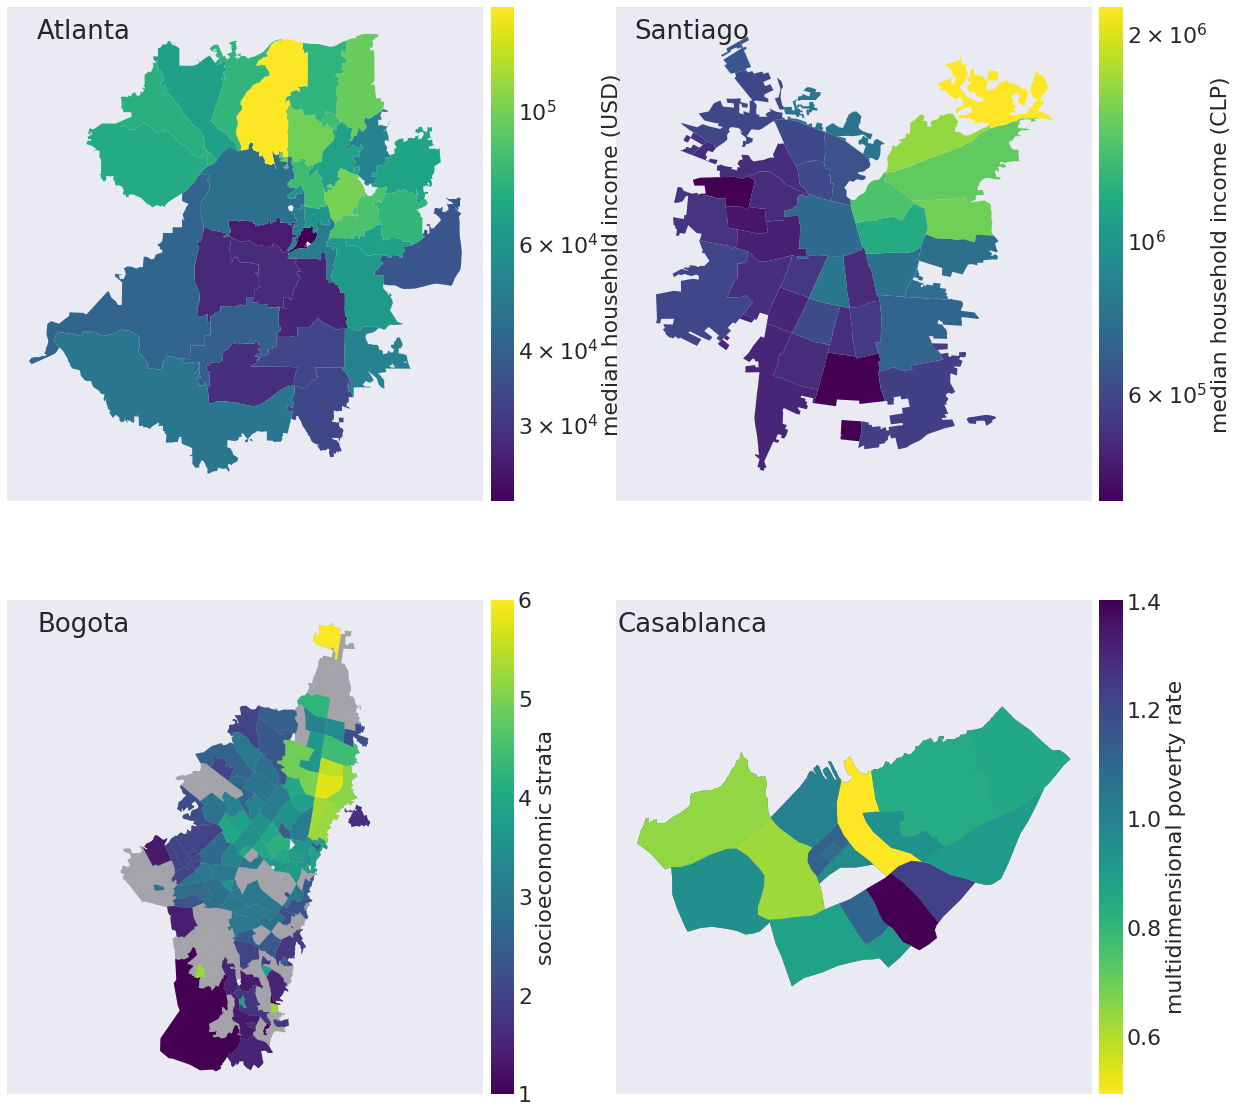

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))

ax = ax.flatten()


##Atlanta
to_plot_gdf = gdf_dict['atlanta']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()


divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)

square_dict['atlanta'].plot(ax=ax[0],alpha=0)

to_plot_gdf.plot(ax=ax[0], column='income', cmap='viridis', legend=False, 
                         linewidth=0.5, norm=matplotlib.colors.LogNorm(vmin=min_v, vmax=max_v)
                )
ax[0].text(0.16, 0.95, 'Atlanta', ha='center', va='center', transform=ax[0].transAxes, fontsize=26)
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])

sm = plt.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=min_v, vmax=max_v))
sm._A = []
cbr = fig.colorbar(sm, ax=ax[0], cax=cax)
cbr.set_label('median household income (USD)', fontsize=22)


##Santiago
to_plot_gdf = gdf_dict['santiago']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()


divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
square_dict['santiago'].plot(ax=ax[1],alpha=0)

to_plot_gdf.plot(ax=ax[1], column='income', cmap='viridis', legend=False, 
                         linewidth=0.5, norm=matplotlib.colors.LogNorm(vmin=min_v, vmax=max_v),
                 
                         #legend_kwds={'label': label_str['atlanta'],
                         #             'orientation':'vertical'}
                        )
ax[1].text(0.16, 0.95, 'Santiago', ha='center', va='center', transform=ax[1].transAxes, fontsize=26)

ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.LogNorm(vmin=min_v, vmax=max_v))
sm._A = []
cbr = fig.colorbar(sm, ax=ax[1], cax=cax)
cbr.set_label('median household income (CLP)', fontsize=22)


##Bogota
to_plot_gdf = gdf_dict['bogota']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()

divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.1)

square_dict['bogota'].plot(ax=ax[2],alpha=0)

gdf_dict['bogota'].plot(ax=ax[2], color='k',linewidth=0.5, alpha=0.3)

to_plot_gdf.plot(ax=ax[2], column='income', cmap='viridis', legend=False, 
                         linewidth=0.5, 
#                          legend_kwds={'label': 'socioeconomic strata'}
                )
ax[2].text(0.16, 0.95, 'Bogota', ha='center', va='center', transform=ax[2].transAxes, fontsize=26)

ax[2].set_yticklabels([])
ax[2].set_xticklabels([])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.Normalize(vmin=min_v, vmax=max_v))
sm._A = []
cbr = fig.colorbar(sm, ax=ax[2], cax=cax)
cbr.set_label('socioeconomic strata', fontsize=22)

##Casablanca
to_plot_gdf = gdf_dict['casablanca']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()

divider = make_axes_locatable(ax[3])
cax = divider.append_axes("right", size="5%", pad=0.1)

square_dict['casablanca'].plot(ax=ax[3],alpha=0)

gdf_dict['casablanca'].plot(ax=ax[3], color='k',linewidth=0.5, alpha=0.3)


to_plot_gdf.plot(ax=ax[3], color='grey')
to_plot_gdf.plot(ax=ax[3], column='income', cmap='viridis_r', legend=False, 
                         linewidth=0.5, 
#                          legend_kwds={'label': 'multidimensional poverty rate'}
                        )
ax[3].text(0.16, 0.95, 'Casablanca', ha='center', va='center', transform=ax[3].transAxes, fontsize=26)

ax[3].set_yticklabels([])
ax[3].set_xticklabels([])
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=matplotlib.colors.Normalize(vmin=min_v, vmax=max_v))
sm._A = []
cbr = fig.colorbar(sm, ax=ax[3], cax=cax)
cbr.set_label('multidimensional poverty rate', fontsize=22)

plt.savefig('figures/Fig1_maps_cities.pdf', bbox_inches='tight')